In [71]:
from numpy import genfromtxt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from sklearn.cluster import DBSCAN

try: 
    import umap
except ImportError:
    print("Please install umap-learn to run this notebook: pip install umap-learn")
    
randomSeed = 4232674

In [72]:
data = pd.read_table('a.txt', sep="\t")

In [73]:
data

,Cell,Cy72_CD45_H02_S758_comb,CY58_1_CD45_B02_S974_comb,Cy71_CD45_D08_S524_comb,Cy81_FNA_CD45_B01_S301_comb,Cy80_II_CD45_B07_S883_comb,Cy81_Bulk_CD45_B10_S118_comb,Cy72_CD45_D09_S717_comb,Cy74_CD45_A03_S387_comb,Cy71_CD45_B05_S497_comb,...,CY75_1_CD45_CD8_7__S265_comb,CY75_1_CD45_CD8_3__S127_comb,CY75_1_CD45_CD8_1__S61_comb,CY75_1_CD45_CD8_1__S12_comb,CY75_1_CD45_CD8_1__S25_comb,CY75_1_CD45_CD8_7__S223_comb,CY75_1_CD45_CD8_1__S65_comb,CY75_1_CD45_CD8_1__S93_comb,CY75_1_CD45_CD8_1__S76_comb,CY75_1_CD45_CD8_7__S274_comb
0,tumor,72.0000,58.0000,71.0000,81.0000,80.0000,81.0000,72.0000,74.0000,71.0000,...,75.0000,75.0000,75.00000,75.00000,75.0000,75.0000,75.0000,75.0000,75.0000,75.0000
1,"malignant(1=no,2=yes,0=unresolved)",1.0000,1.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,2.0000,...,1.0000,1.0000,1.00000,1.00000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,"non-malignant cell type (1=T,2=B,3=Macro.4=End...",2.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,...,1.0000,1.0000,1.00000,1.00000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000
3,C9orf152,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.00000,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,RPS11,9.2172,8.3745,9.3130,7.8876,8.3291,7.8336,8.3737,8.1338,8.4373,...,0.0000,7.8639,5.85050,0.62639,6.2734,5.4889,4.9262,7.0958,3.9970,3.9897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,PIK3IP1,7.6069,0.0000,0.0000,0.0000,0.0000,0.0000,6.5457,0.0000,0.0000,...,0.0000,0.0000,0.00000,0.00000,6.4087,0.0000,3.7384,0.0000,0.0000,6.7535
23685,SNRPD2,0.0000,0.0000,3.9871,5.2639,6.0824,5.6424,0.0000,0.0000,5.9451,...,4.4471,4.7607,0.00000,4.74330,5.4041,6.0986,0.0000,0.0000,0.0000,5.9313
23686,SLC39A6,0.0000,0.0000,3.8777,3.7660,1.7816,4.3679,0.0000,0.0000,3.4498,...,0.0000,0.0000,0.47546,0.00000,0.0000,0.0000,0.0000,0.0000,0.0000,5.2398
23687,CTSC,2.6638,6.9901,1.6126,4.8417,4.4607,1.8824,1.0718,1.6938,1.1197,...,2.3357,1.3150,2.06710,3.19260,1.4615,3.6464,7.0004,1.9615,7.1918,6.1588


In [74]:
npData = data.values[3:,1:]

In [75]:
npData = npData.astype('float32').T

In [76]:
np.random.default_rng(randomSeed).shuffle(npData)

In [77]:
# use 80% of dataset as training set, and 20% as test set

train = npData[npData.shape[0]//5:]
test = npData[:npData.shape[0]//5]
train.shape, test.shape

((3716, 23686), (929, 23686))

In [78]:
activations = (npData > 0.0).sum(axis=0)

(-500.0, 24186.0)

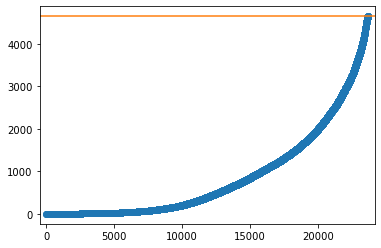

In [79]:
plt.plot(np.sort(activations), 'o')
plt.plot((-10000, npData.shape[1]+10000), (npData.shape[0], npData.shape[0]), '-o')
plt.xlim(-500, npData.shape[1]+500)

In [80]:
trans = umap.UMAP(n_neighbors=10, random_state=randomSeed, 
                  metric="euclidean", output_metric="euclidean", 
                  init="spectral", verbose=True)

In [81]:
trans.fit(train)
trans.embedding_.shape

UMAP(n_neighbors=10, random_state=4232674, verbose=True)
Construct fuzzy simplicial set
Wed Aug 26 11:05:31 2020 Finding Nearest Neighbors
Wed Aug 26 11:05:32 2020 Finished Nearest Neighbor Search
Wed Aug 26 11:05:32 2020 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Aug 26 11:05:44 2020 Finished embedding


(3716, 2)

eps=0.15 -> 17 clusters found with 2.77% (103/3716) noise points


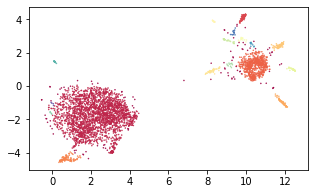

eps=0.16 -> 16 clusters found with 2.56% (95/3716) noise points


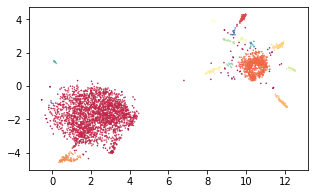

eps=0.18 -> 14 clusters found with 1.99% (74/3716) noise points


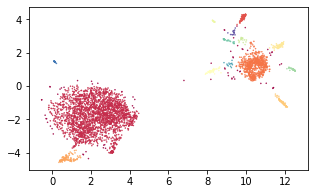

eps=0.19 -> 14 clusters found with 1.61% (60/3716) noise points


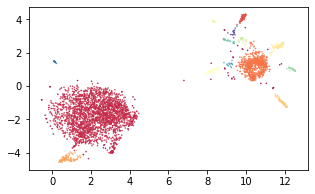

eps=0.17 -> 15 clusters found with 2.23% (83/3716) noise points


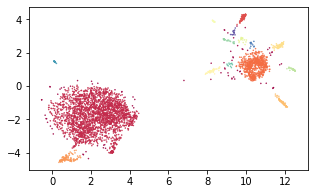

In [82]:
for eps in [0.15, 0.16, 0.18, 0.19, 0.17]:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(trans.embedding_)
    countInvalidPoints = (labels==-1).sum()
    print(f"eps={eps:.2f} -> {len(set(labels)) - (0 if countInvalidPoints == 0 else 1)} clusters found with "
         + f"{countInvalidPoints/train.shape[0]*100:.2f}% ({countInvalidPoints}/{train.shape[0]}) noise points")
    
    size = 5
    plt.figure(figsize=(size, size*0.6))
    plt.scatter(
        trans.embedding_[:, 0],
        trans.embedding_[:, 1],
        c=labels, cmap="Spectral",
        s=size/20
    )
    plt.show()

# --> eps=0.17 seems to yield the best result, thus left as last one

In [83]:
transformedTest = trans.transform(test)
transformedTest.shape

	completed  0  /  100 epochs
	completed  10  /  100 epochs
	completed  20  /  100 epochs
	completed  30  /  100 epochs
	completed  40  /  100 epochs
	completed  50  /  100 epochs
	completed  60  /  100 epochs
	completed  70  /  100 epochs
	completed  80  /  100 epochs
	completed  90  /  100 epochs


(929, 2)

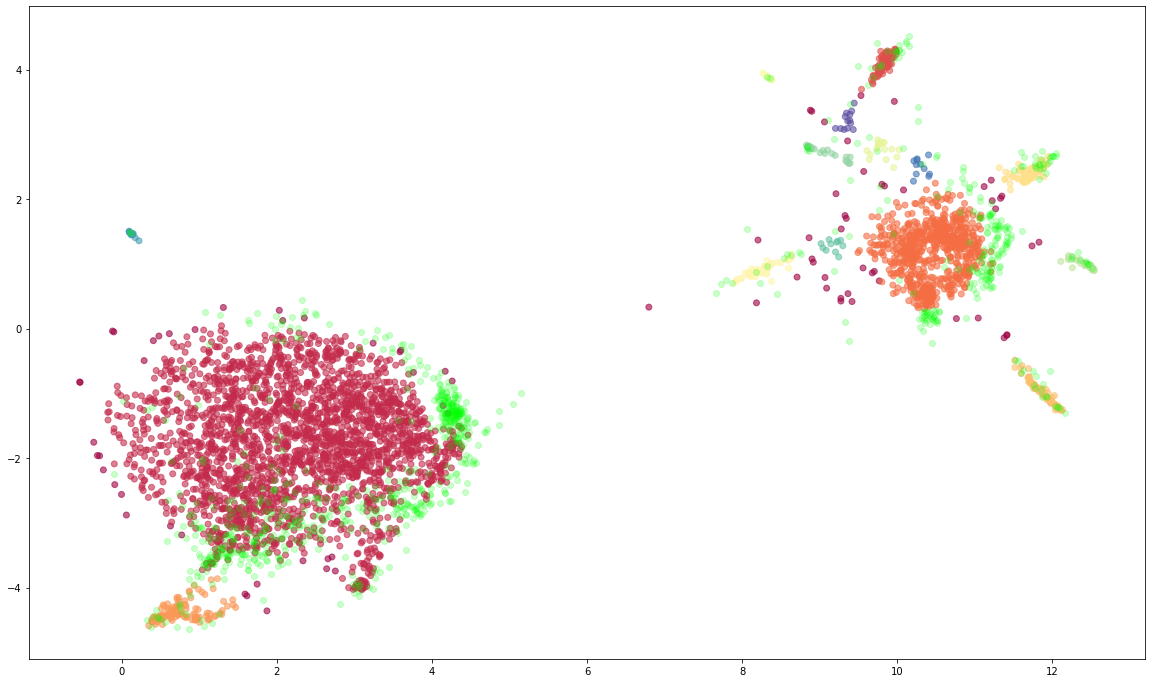

In [92]:
# this cell uses the latest created labels
plt.figure(figsize=(20, 12))
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], alpha=0.6, cmap="Spectral", c=labels)
plt.scatter(transformedTest[:,0], transformedTest[:,1], c="#00ff00", alpha=0.2)